In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from os import makedirs, listdir
from os.path import join, isfile, isdir, exists, splitext
from pprint import pprint
import json
Settings = json.load(open('settings.txt'))
pprint(Settings)
print("")
from pak.datasets.MOT import MOT16
from pak import utils
import sys
sys.path.append('../')
from pak import utils
from pak.evaluation import one_hot_classification as ohc

from cabbage.features.ReId import StackNet64x64, get_element

root = Settings['data_root']
mot16 = MOT16(root)

stacknet = StackNet64x64(root)

VIDEO = "MOT16-02"
img_loc = mot16.get_test_imgfolder(VIDEO)

X, Y_det, Y_gt = mot16.get_train(VIDEO, memmapped=True)

{'data_root': '/home/data',
 'deepmatch': '/home/deepmatching_1.2.2_c++/deepmatching-static'}



Using TensorFlow backend.


/home/data/MOT16 found :)
Found model /home/data/reid_models/stacknet64x64_84acc.h5! :)
MOT16: load memmapped file /home/data/MOT16/train/MOT16-02/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded


(5, 9)
dict_keys(['2', '3', '10', '14', '19'])


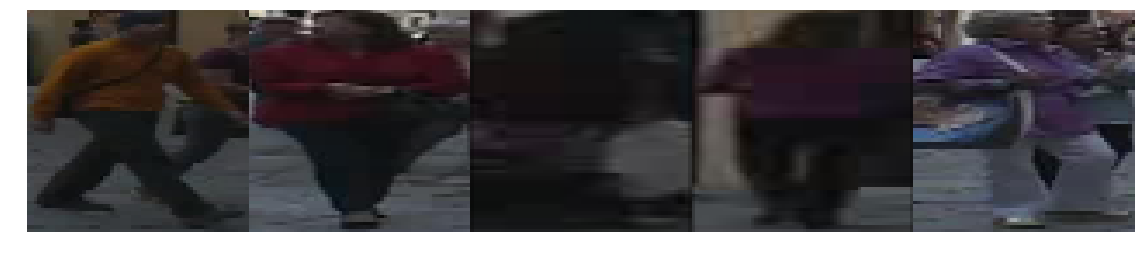

In [2]:
y_gt = utils.extract_eq(Y_gt, col=0, value=1)
y_gt = utils.extract_eq(y_gt, col=7, value=1)
y_gt = utils.extract_eq(y_gt, col=8, value=1)
print(y_gt.shape)

lookup = {}

pids = y_gt[:,1]
left = y_gt[:,2]
top = y_gt[:,3]
width = y_gt[:,4]
height = y_gt[:,5]

Ims = []

for pid, x, y, w, h in zip(*[pids, left, top, width, height]):
    if pid not in lookup:
        lookup[str(int(pid))] = []
    
    x = get_element(X[0], (x,y,w,h), (64,64), force_uint=True)
    lookup[str(int(pid))].append(x)
    Ims.append(x)
        
        
print(lookup.keys())
utils.plot(Ims, cols=5)

predict the same:  [[0.0019511999562382698 0.9980487823486328]]


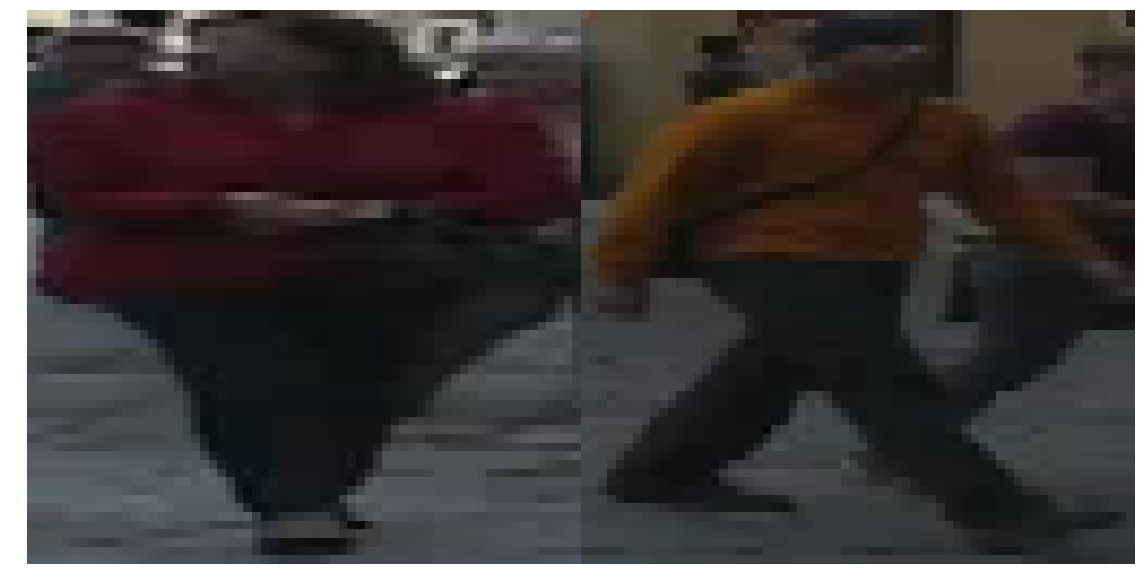

In [3]:
a,b = lookup['2'][0], lookup['3'][0]

print('predict the same: ', stacknet.predict(b, a).astype('object'))

utils.plot([b,a], cols=2)

finished generating X and Y for MOT16-02
load positive pairs from disk
pos pairs: (754629, 2)
MOT16-02 .. elapsed 0.017063379287719727
finished generating X and Y for MOT16-04
load positive pairs from disk
pos pairs: (3649988, 2)
MOT16-04 .. elapsed 0.05113482475280762
finished generating X and Y for MOT16-05
load positive pairs from disk
pos pairs: (51050, 2)
MOT16-05 .. elapsed 0.004868507385253906
finished generating X and Y for MOT16-09
load positive pairs from disk
pos pairs: (231718, 2)
MOT16-09 .. elapsed 0.00926065444946289
finished generating X and Y for MOT16-10
load positive pairs from disk
pos pairs: (1445910, 2)
MOT16-10 .. elapsed 0.026679039001464844
finished generating X and Y for MOT16-11
load positive pairs from disk
pos pairs: (844770, 2)
MOT16-11 .. elapsed 0.018063068389892578
finished generating X and Y for MOT16-13
load positive pairs from disk
pos pairs: (441830, 2)
MOT16-13 .. elapsed 0.01778244972229004


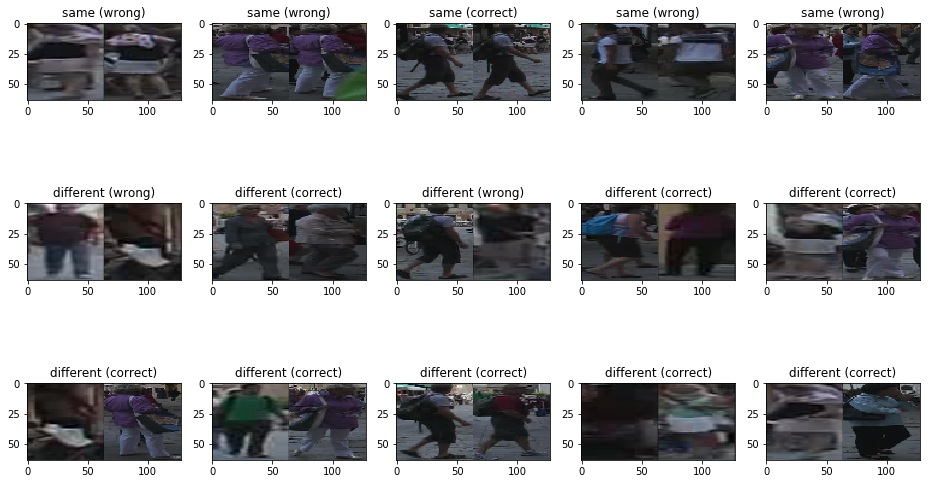

In [4]:
from cabbage.data.MOT16Sampler import MOT16Sampler

sampler = MOT16Sampler(root, (64, 64))
X, Y = sampler.get_named_batch('MOT16-02', 5, 10)

fig = plt.figure(figsize=(16,16))



for i,(x,y) in enumerate(zip(X,Y)):
    ax = fig.add_subplot(5,5,i+1)
    a = x[:,:,0:3]
    b = x[:,:,3:6]
    Y_ = stacknet.predict(a, b)
    y_ = (Y_[0][0] > 0.5) * 1
    correct_str = " (correct)" if y_ == y[0] else " (wrong)"
    txt = 'same' if y[0] == 1 else 'different'
    ax.set_title(txt + correct_str)
    x = np.concatenate([a, b], axis=1)
    ax.imshow(x)

plt.show()